In [44]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
%matplotlib inline

In [4]:
#load datset
df = pd.read_csv("C:/Users/User/Documents/GitHub/Netflix-Data-Analysis/data/netflix_titles.csv")

In [5]:
#check shape and top rows
print("Rows, Columns:", df.shape)
df.head()

Rows, Columns: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
#data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#missing values count
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
#summary of numeric columns
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Handling Missing Data

In [9]:
#Fill missing country and rating with 'Unknown'
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

In [10]:
# Fill missing date_added with a placeholder
df['date_added'] = df['date_added'].fillna('Unknown')

In [11]:
# Replace missing director and cast with 'Not Available'
df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Available')

In [12]:
# Verify again
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [13]:
df['director'].unique()
df['cast'].unique()


array(['Not Available',
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      shape=(7693,), dtype=object)

In [14]:
df['director'].replace('', np.nan, inplace=True)
df['cast'].replace('', np.nan, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14984\4011024150.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].replace('', np.nan, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14984\4011024150.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [15]:
df['director'].replace(['', 'None', 'N/A'], np.nan, inplace=True)
df['cast'].replace(['', 'None', 'N/A'], np.nan, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14984\4244721709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].replace(['', 'None', 'N/A'], np.nan, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14984\4244721709.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [16]:
df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Available')

In [17]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [18]:
df['duration'].replace('', np.nan, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14984\4003778108.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].replace('', np.nan, inplace=True)


In [19]:
df['duration'] = df['duration'].fillna('Unknown')

In [20]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [21]:
# Check duplicates
print("Duplicates before:", df.duplicated().sum())

Duplicates before: 0


In [23]:
# Remove duplicates
df.drop_duplicates(inplace=True)

print("Duplicates after:", df.duplicated().sum())

Duplicates after: 0


In [24]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [25]:
# Extract year and month added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [26]:
# Convert duration into numeric values
def get_duration(x):
    if pd.isna(x): return np.nan
    val = str(x).split()[0]
    try:
        return int(val)
    except:
        return np.nan

df['duration_int'] = df['duration'].apply(get_duration)

In [41]:
print("Rows, Columns:", df.shape)
df.head()

Rows, Columns: (8807, 16)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min,year_added,month_added,duration_int
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,2021.0,9.0,90.0
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,2021.0,9.0,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,2021.0,9.0,1.0
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,2021.0,9.0,1.0
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,2021.0,9.0,2.0


Detecting Outliers (duration)

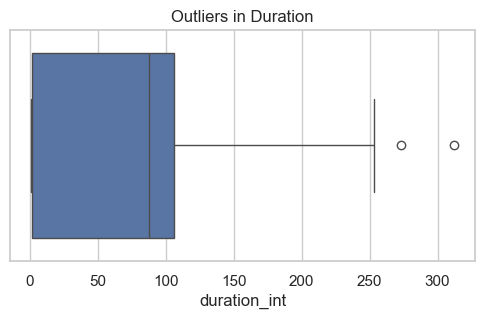

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_int
717,s718,Movie,Headspace: Unwind Your Mind,Not Available,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",Unknown,2021-06-15,2021,TV-G,273 min,Documentaries,"Do you want to relax, meditate or sleep deeply...",2021.0,6.0,273.0
4253,s4254,Movie,Black Mirror: Bandersnatch,Not Available,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018.0,12.0,312.0


In [27]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['duration_int'])
plt.title("Outliers in Duration")
plt.show()

# Find actual outlier values
Q1 = df['duration_int'].quantile(0.25)
Q3 = df['duration_int'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['duration_int'] < Q1 - 1.5*IQR) | (df['duration_int'] > Q3 + 1.5*IQR)]
outliers.head()

Normalize & Standardize Duration

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df['duration_minmax'] = scaler.fit_transform(df[['duration_int']])

scaler_std = StandardScaler()
df['duration_standard'] = scaler_std.fit_transform(df[['duration_int']])

Feature Encoding

In [30]:
# Convert type (Movie/TV Show) to numeric
df['type_encoded'] = df['type'].map({'Movie': 1, 'TV Show': 0})

# Convert rating to category codes
df['rating_encoded'] = df['rating'].astype('category').cat.codes


Feature Correlation Analysis

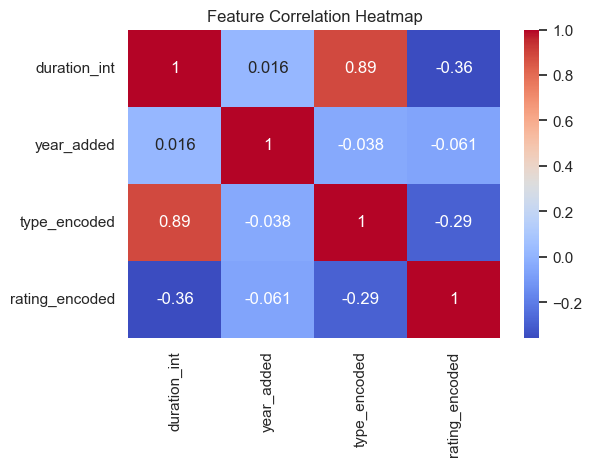

In [31]:
corr = df[['duration_int', 'year_added', 'type_encoded', 'rating_encoded']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


Pivot Table Analysis

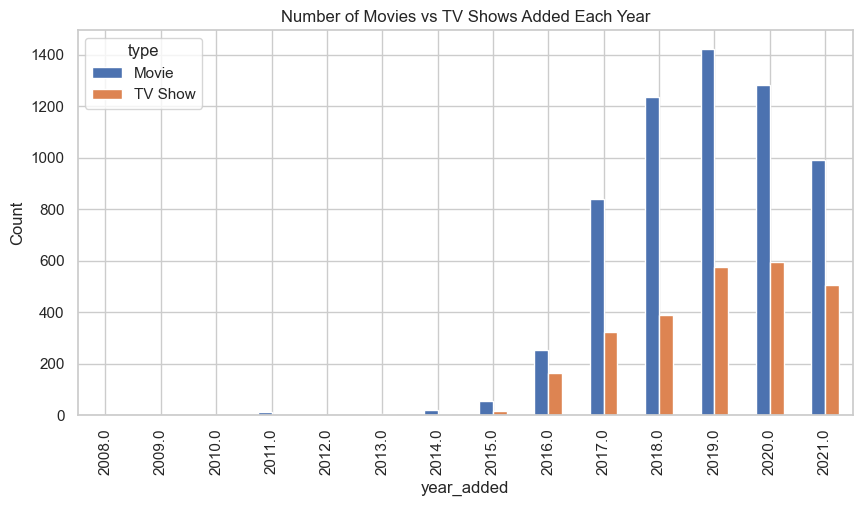

In [32]:
# How many movies added each year by type
pivot = df.pivot_table(index='year_added', columns='type', values='show_id', aggfunc='count')
pivot.plot(kind='bar', figsize=(10,5))
plt.title("Number of Movies vs TV Shows Added Each Year")
plt.ylabel("Count")
plt.show()


Visualize Distributions

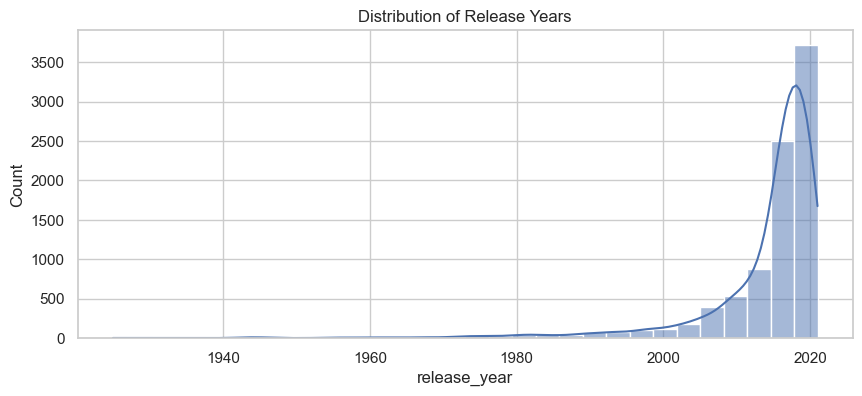

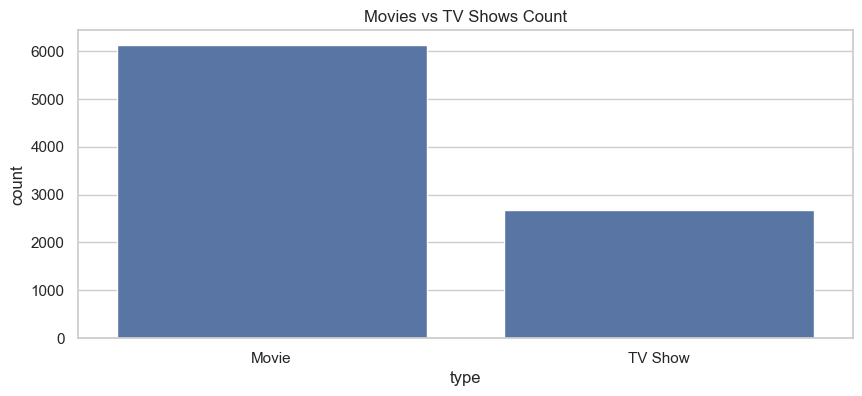

In [33]:
plt.figure(figsize=(10,4))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title("Distribution of Release Years")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows Count")
plt.show()


Simple Predictive Modeling (Regression Example)

Mean Squared Error: 566.9804130061326
R² Score: 0.7848553919895449


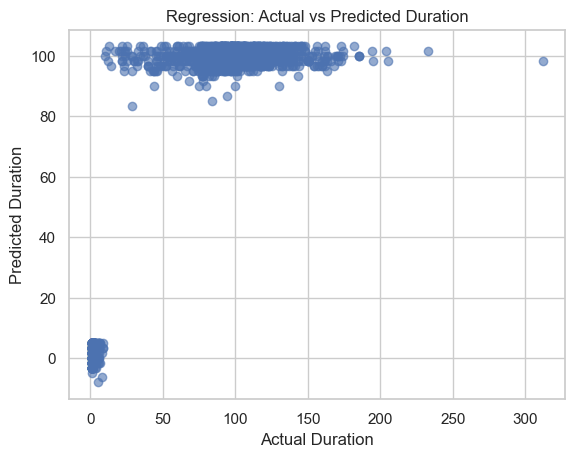

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop missing duration rows
model_df = df.dropna(subset=['duration_int', 'year_added', 'type_encoded'])

X = model_df[['year_added', 'type_encoded']]
y = model_df['duration_int']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Visualize regression line (pred vs actual)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Duration")
plt.ylabel("Predicted Duration")
plt.title("Regression: Actual vs Predicted Duration")
plt.show()


In [35]:
import nltk
nltk.download('vader_lexicon')   # for VADER sentiment
nltk.download('punkt')           # sometimes used by text processing

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

Sentiment Analysis on description 

sentiment_label
positive    4029
negative    3787
neutral      991
Name: count, dtype: int64


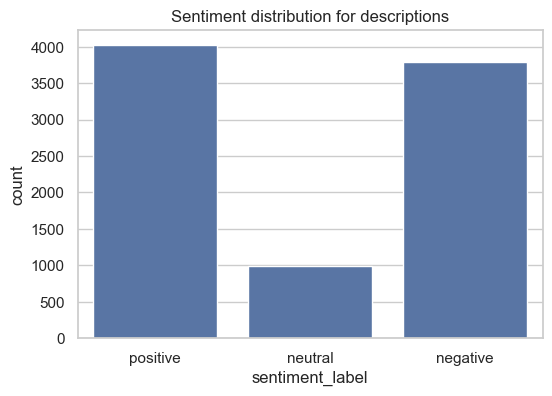

In [37]:
# 1. Sentiment analysis (VADER)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Ensure description exists
df['description'] = df['description'].fillna("")

# Compute sentiment scores
df['sentiment_scores'] = df['description'].apply(lambda x: sid.polarity_scores(x))
df['sentiment_compound'] = df['sentiment_scores'].apply(lambda d: d['compound'])

# Label sentiment
def label_sentiment(x):
    if x >= 0.05:
        return 'positive'
    elif x <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['sentiment_compound'].apply(label_sentiment)

# Quick checks
print(df['sentiment_label'].value_counts())
df[['title','description','sentiment_compound','sentiment_label']].head(10)

# Save a small summary CSV
df[['show_id','title','sentiment_compound','sentiment_label']].to_csv("../data/netflix_sentiment_summary.csv", index=False)

# Plot distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_label', data=df, order=['positive','neutral','negative'])
plt.title("Sentiment distribution for descriptions")
plt.savefig("../images/sentiment_distribution.png", bbox_inches='tight')
plt.show()


Top 10 Actors and Top 10 Directors

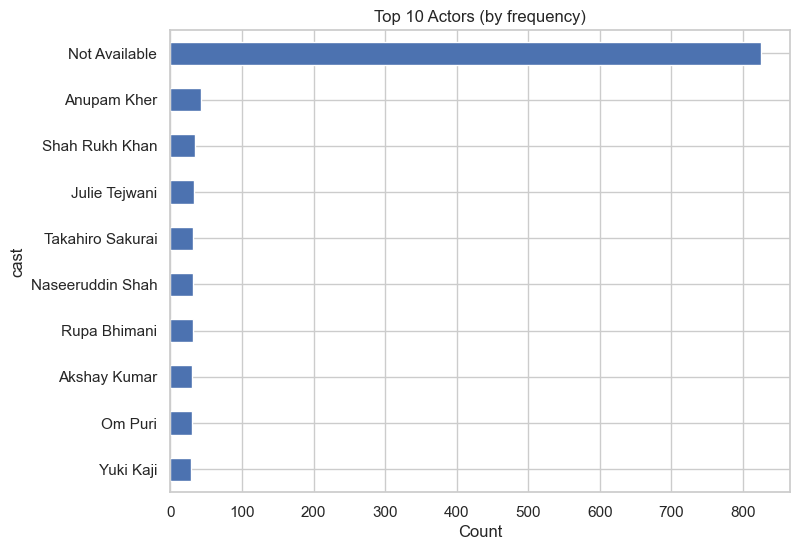

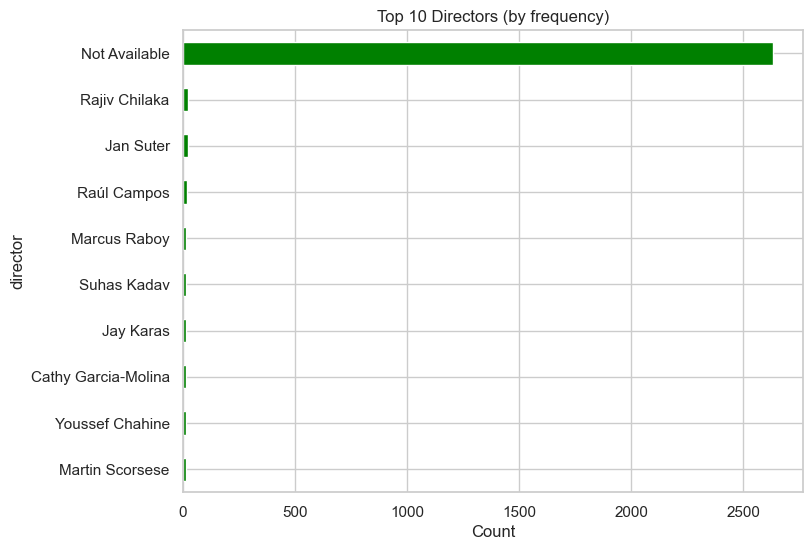

In [38]:
from collections import Counter

# --- Top 10 Actors ---
# Fill NA and split
df['cast'] = df['cast'].fillna("Unknown")
actors_series = df['cast'].str.split(',').explode().str.strip()
# Remove empty / 'Unknown'
actors_series = actors_series[actors_series.str.len() > 0]
actor_counts = actors_series.value_counts().head(20)
actor_counts.head(10)

# Plot top 10 actors
plt.figure(figsize=(8,6))
actor_counts.head(10).sort_values().plot(kind='barh')
plt.title("Top 10 Actors (by frequency)")
plt.xlabel("Count")
plt.savefig("../images/top_10_actors.png", bbox_inches='tight')
plt.show()

# --- Top 10 Directors ---
df['director'] = df['director'].fillna("Unknown")
directors_series = df['director'].str.split(',').explode().str.strip()
directors_series = directors_series[directors_series.str.len() > 0]
director_counts = directors_series.value_counts().head(20)
director_counts.head(10)

plt.figure(figsize=(8,6))
director_counts.head(10).sort_values().plot(kind='barh', color='green')
plt.title("Top 10 Directors (by frequency)")
plt.xlabel("Count")
plt.savefig("../images/top_10_directors.png", bbox_inches='tight')
plt.show()


WordCloud of Most Used Words (from description or listed_in)

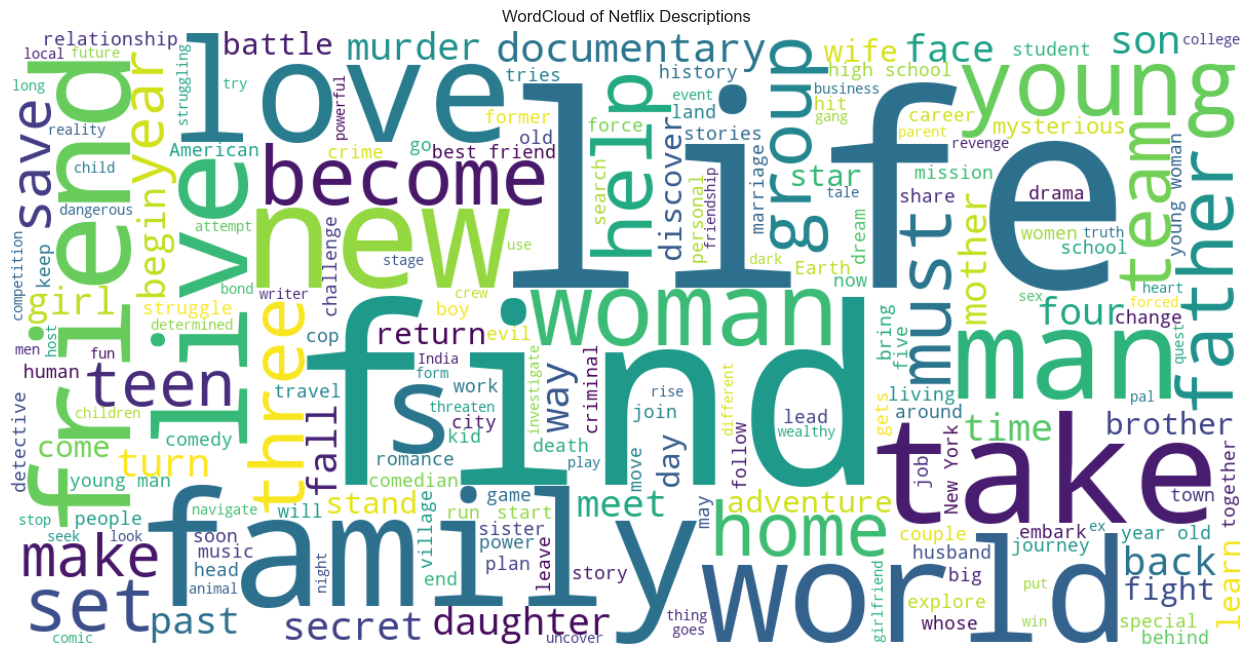

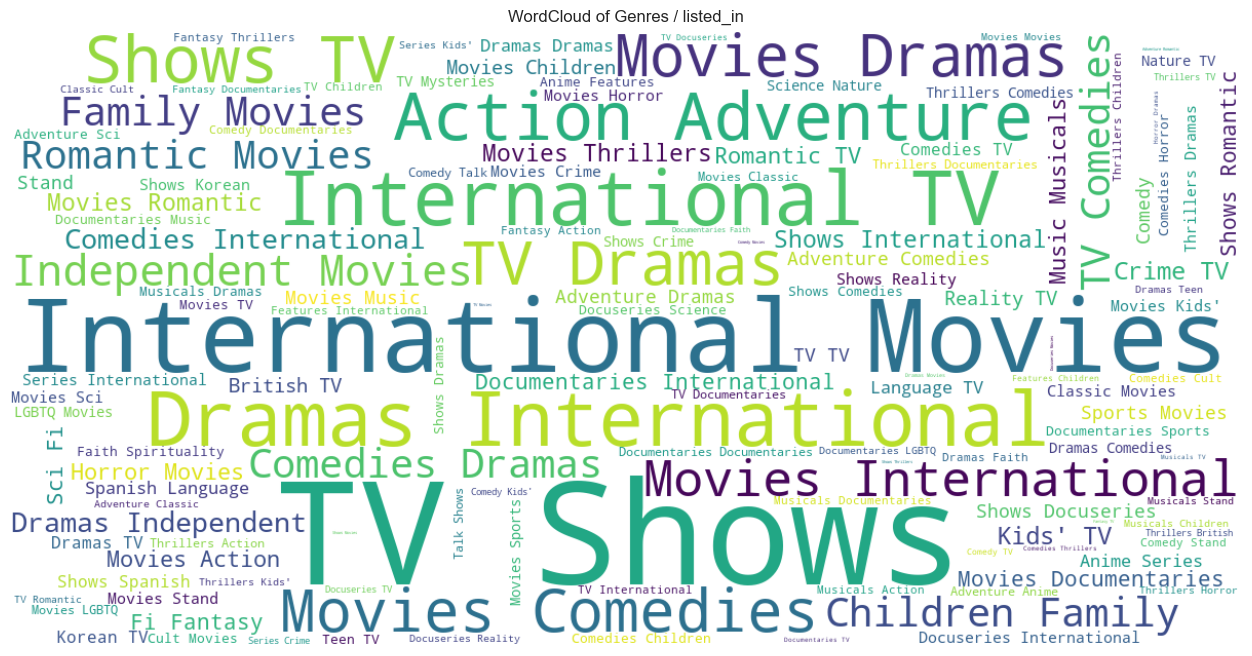

In [39]:
from wordcloud import WordCloud, STOPWORDS

# WordCloud from descriptions
text = " ".join(df['description'].dropna().astype(str).tolist())

# Add some stopwords
stopwords = set(STOPWORDS)
extra_stop = {'film','series','show','movie','based','one','two','first','season'}
stopwords = stopwords.union(extra_stop)

wc = WordCloud(width=1200, height=600, background_color='white', stopwords=stopwords, max_words=200).generate(text)

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Netflix Descriptions")
plt.savefig("../images/wordcloud_descriptions.png", bbox_inches='tight')
plt.show()

# WordCloud from genres/listed_in (optional)
if 'listed_in' in df.columns:
    genre_text = " ".join(df['listed_in'].dropna().str.replace(',',' ').tolist())
    wc_genre = WordCloud(width=1200, height=600, background_color='white', max_words=200).generate(genre_text)
    plt.figure(figsize=(16,8))
    plt.imshow(wc_genre, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud of Genres / listed_in")
    plt.savefig("../images/wordcloud_genres.png", bbox_inches='tight')
    plt.show()


Clustering

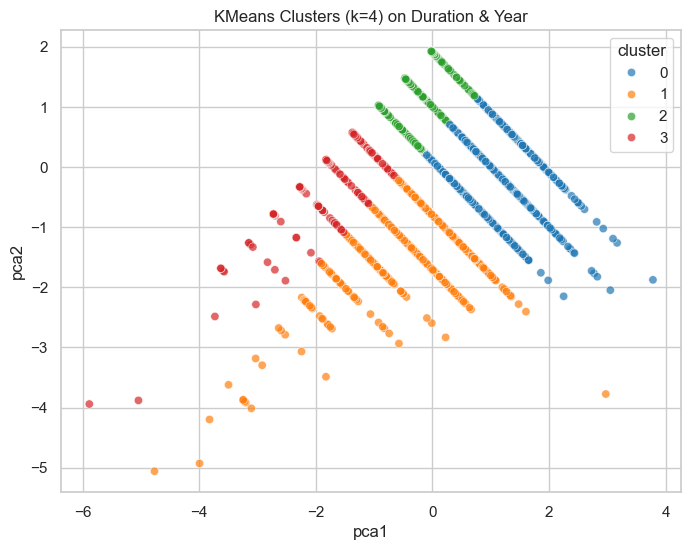

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Prepare numeric dataset: drop rows missing duration or year
cluster_df = df.dropna(subset=['duration_int','year_added']).copy()
cluster_df = cluster_df[(cluster_df['duration_int']>0)]  # focus on positive durations

X = cluster_df[['duration_int','year_added']].astype(float)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose k with silhouette (try k=2..6)
sil_scores = {}
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil
sil_scores  # you can inspect which k has best silhouette

# Pick k (e.g., best_k)
best_k = max(sil_scores, key=sil_scores.get)
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
cluster_df['kmeans_cluster'] = labels

# PCA 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
cluster_df['pca1'] = X_pca[:,0]
cluster_df['pca2'] = X_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='pca1', y='pca2', hue='kmeans_cluster', data=cluster_df, palette='tab10', alpha=0.7)
plt.title(f"KMeans Clusters (k={best_k}) on Duration & Year")
plt.legend(title='cluster')
plt.savefig("../images/clusters_duration_year_pca.png", bbox_inches='tight')
plt.show()


To inspect cluster centers in original units:

In [41]:
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
pd.DataFrame(centers, columns=['duration_int','year_added']).round(1)


,duration_int,year_added
0,105.0,2019.9
1,101.4,2017.3
2,5.6,2019.9
3,7.5,2017.1


Clustering by genre (multi-hot encoding)

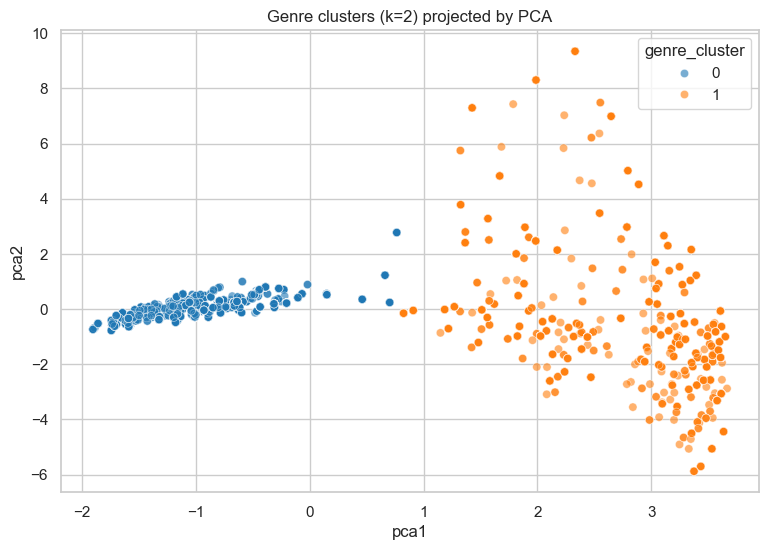

In [42]:
# Multi-hot encode genres
genres_series = df['listed_in'].fillna("").str.split(',').apply(lambda lst: [g.strip() for g in lst if g.strip()!=''])
# Build a genre set
all_genres = sorted(set(g for sub in genres_series for g in sub))
# Create multi-hot matrix
genre_matrix = pd.DataFrame(0, index=df.index, columns=all_genres)
for i, row in genres_series.items():
    for g in row:
        genre_matrix.at[i,g] = 1

# Optional: drop rows with no genres
genre_matrix['has_genre'] = genre_matrix.sum(axis=1)
genre_matrix = genre_matrix[genre_matrix['has_genre']>0].drop(columns='has_genre')

# Scale (not necessary for 0/1 but helps some clustering algorithms)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)  # with_mean False for sparse-like data
genre_scaled = scaler.fit_transform(genre_matrix)

# KMeans (choose k via silhouette)
sil_scores = {}
for k in range(2,8):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(genre_scaled)
    sil_scores[k] = silhouette_score(genre_scaled, labels)
sil_scores

best_k = max(sil_scores, key=sil_scores.get)
km = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = km.fit_predict(genre_scaled)

# Map labels back to df rows
genre_cluster_df = df.loc[genre_matrix.index].copy()
genre_cluster_df['genre_cluster'] = labels

# For visualization reduce to 2D with PCA or t-SNE (PCA first)
pca = PCA(n_components=2, random_state=42)
genre_pca = pca.fit_transform(genre_scaled)
genre_cluster_df['pca1'] = genre_pca[:,0]
genre_cluster_df['pca2'] = genre_pca[:,1]

plt.figure(figsize=(9,6))
sns.scatterplot(x='pca1', y='pca2', hue='genre_cluster', data=genre_cluster_df, palette='tab10', alpha=0.6)
plt.title(f"Genre clusters (k={best_k}) projected by PCA")
plt.savefig("../images/genre_clusters_pca.png", bbox_inches='tight')
plt.show()


In [43]:
# Top genres per cluster
cluster_genre_profile = {}
for c in range(best_k):
    rows = genre_matrix[genre_cluster_df['genre_cluster']==c]
    mean_profile = rows.mean().sort_values(ascending=False).head(8)
    cluster_genre_profile[c] = mean_profile
cluster_genre_profile


{0: International Movies        0.419960
 Dramas                      0.370365
 Comedies                    0.255456
 Documentaries               0.132611
 Action & Adventure          0.131085
 Independent Movies          0.115367
 Children & Family Movies    0.097818
 Romantic Movies             0.094003
 dtype: float64,
 1: International TV Shows    0.599379
 TV Dramas                 0.338509
 TV Comedies               0.257764
 Crime TV Shows            0.208518
 Romantic TV Shows         0.164153
 Docuseries                0.137533
 British TV Shows          0.112245
 Kids' TV                  0.102484
 dtype: float64}

In [45]:
# Select relevant columns
ml_df = df[['type', 'release_year', 'rating', 'duration', 'country']].copy()

# Drop missing values
ml_df = ml_df.dropna()

# Convert duration to numeric (e.g., "90 min" -> 90)
def convert_duration(x):
    if 'min' in x:
        return int(x.replace(' min', ''))
    elif 'Season' in x:
        return int(x.split()[0]) * 60  # treating 1 season ≈ 60 mins
    else:
        return np.nan

ml_df['duration_mins'] = ml_df['duration'].apply(convert_duration)
ml_df = ml_df.dropna(subset=['duration_mins'])
ml_df.head()


,type,release_year,rating,duration,country,duration_mins
0,Movie,2020,PG-13,90 min,United States,90.0
1,TV Show,2021,TV-MA,2 Seasons,South Africa,120.0
2,TV Show,2021,TV-MA,1 Season,Unknown,60.0
3,TV Show,2021,TV-MA,1 Season,Unknown,60.0
4,TV Show,2021,TV-MA,2 Seasons,India,120.0


Encode Categorical Columns

In [47]:
# Encode target (Movie / TV Show)
le_type = LabelEncoder()
ml_df['type_encoded'] = le_type.fit_transform(ml_df['type'])

# Encode rating and country
le_rating = LabelEncoder()
ml_df['rating_encoded'] = le_rating.fit_transform(ml_df['rating'])

le_country = LabelEncoder()
ml_df['country_encoded'] = le_country.fit_transform(ml_df['country'])

In [48]:
X = ml_df[['release_year', 'rating_encoded', 'country_encoded', 'duration_mins']]
y = ml_df['type_encoded']

Split Data into Train/Test Sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Scale the Data

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train Logistic Regression Model

In [51]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)


In [52]:
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 0.6984667802385008

📊 Confusion Matrix:
 [[1136   59]
 [ 472   94]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.95      0.81      1195
           1       0.61      0.17      0.26       566

    accuracy                           0.70      1761
   macro avg       0.66      0.56      0.54      1761
weighted avg       0.68      0.70      0.63      1761



 Visualize Confusion Matrix

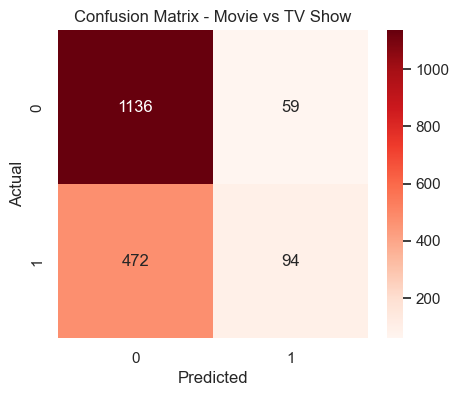

In [53]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Movie vs TV Show")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


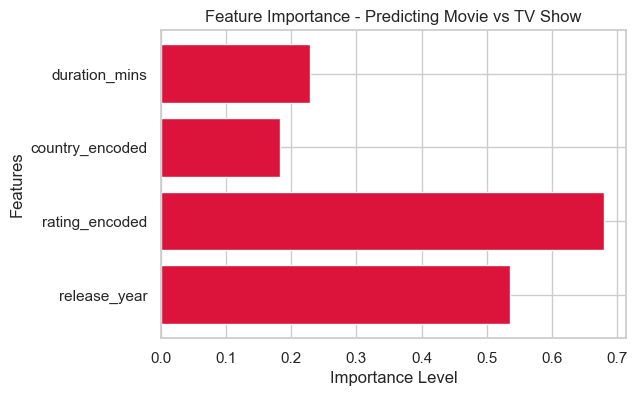

In [54]:
importance = abs(model.coef_[0])
features = X.columns

plt.figure(figsize=(6,4))
plt.barh(features, importance, color='crimson')
plt.title("Feature Importance - Predicting Movie vs TV Show")
plt.xlabel("Importance Level")
plt.ylabel("Features")
plt.show()


1. Model Accuracy

Accuracy = 0.698 (≈70%)
This means that the model correctly predicts the outcome for about 70% of the cases.

While 70% seems decent, accuracy alone can be misleading because your dataset is imbalanced (0 class has 1195 samples, 1 class has 566 samples).

2. Confusion Matrix
[[1136   59]
 [ 472   94]]


True Negatives (TN) = 1136 → Correctly predicted class 0.

False Positives (FP) = 59 → Predicted 1 but actually 0.

False Negatives (FN) = 472 → Predicted 0 but actually 1.

True Positives (TP) = 94 → Correctly predicted class 1.

Observation:

The model is very good at predicting class 0 (negative/majority class).

The model struggles with class 1 (positive/minority class), missing 472 out of 566 cases (~83% misclassified).

3. Classification Report
Class	Precision	Recall	F1-score	Support
0	0.71	0.95	0.81	1195
1	0.61	0.17	0.26	566

Interpretation:

Class 0: High recall (0.95) → most actual class 0 samples are correctly identified.

Class 1: Low recall (0.17) → most actual class 1 samples are misclassified.

F1-score is low for class 1 (0.26) → the model struggles to balance precision and recall for this class.

Macro average F1 = 0.54 → average performance across classes is moderate, weighted avg F1 = 0.63 → influenced by majority class.

4. Insights

Imbalanced Performance: The model performs much better for the majority class (0) than the minority class (1).

Potential Actions:

Use resampling techniques (oversample class 1 or undersample class 0).

Try class-weighted models to penalize misclassification of class 1.

Evaluate using ROC-AUC or PR-AUC instead of only accuracy.

Practical Implication:

If this is predicting something critical (e.g., disease presence, fraud detection), missing 83% of positive cases is a serious issue. The model needs improvement for real-world application.